In [64]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sbn
import re

In [3]:
jaws = pd.read_csv("data/global_shark_attacks.csv")
print(jaws.shape)

(25723, 24)


In [4]:
jaws.drop_duplicates(inplace=True)
jaws.dropna(thresh=3, inplace=True)
print(jaws.shape)


(6302, 24)


In [5]:
jaws.drop(columns=['pdf', 'href formula', 'href', 'Unnamed: 22', 'Unnamed: 23', 'Case Number','Investigator or Source', 'original order', 'Case Number.1','Case Number.2'], inplace=True)
jaws.tail()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN
6301,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN


In [120]:
jaws.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6302 entries, 0 to 6301
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6302 non-null   object 
 1   Year         6300 non-null   float64
 2   Type         6298 non-null   object 
 3   Country      6252 non-null   object 
 4   Area         5847 non-null   object 
 5   Location     5762 non-null   object 
 6   Activity     5758 non-null   object 
 7   Name         6092 non-null   object 
 8   Sex          5737 non-null   object 
 9   Age          3471 non-null   object 
 10  Injury       6274 non-null   object 
 11  Fatal (Y/N)  5763 non-null   object 
 12  Time         2948 non-null   object 
 13  Species      3464 non-null   object 
dtypes: float64(1), object(13)
memory usage: 738.5+ KB


In [6]:
jaws.columns = [i.lower().replace(" ", "-") for i in jaws.columns]
jaws = jaws.rename(columns={"species-": "species", "sex-":"gender", "fatal-(y/n)":"fatal"})
jaws

,date,year,type,country,area,location,activity,name,gender,age,injury,fatal,time,species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [7]:
jaws["species"] = jaws["species"].replace(r"\dm?'?\sto\s\d", "unidentified", regex=True)
jaws["species"] = jaws["species"].replace(r"\d\s?['.m?]\d?\sm?", "unidentified", regex=True)
jaws["species"] = jaws["species"].replace(r'\d+"?-?[lb]?', "unidentified", regex=True)

In [8]:

jaws["species"] = jaws["species"].fillna("Unidentified")

shark_types = {"white": "White Shark", "unidentified": "Unidentified","small shark":"Unidentified", "tiger": "Tiger Shark", "bull": "Bull Shark", "dusky":"Dusky Shark",
               "blue": "Blue Shark", "nurse":"Nurse Shark", "blacktip":"Blacktip Shark", "wobbegong" : "Wobbegong Shark", "hammerhead":"Hammerhead Shark", "dog":"Dogfish Shark",
               "bronze":"Bronze Whaler Shark","whaler":"Bronze Whaler Shark", "mako":"Mako Shark", "spinner":"Spinner Shark", "lemon":"Lemon Shark", "Unknown":"Unidentified",
               "raggedtooth":"Raggedtooth Shark", "reef":"Caribbean reef Shark", "sand":"Nurse Shark","sevengill":"Broadnose Sevengill Shark", "C. macrurus":"Dusky Shark",
               "broadnose":"Broadnose Sevengill Shark","7-gill":"Broadnose Sevengill Shark", "zambesi":"Bull Shark", "porbeagle":" SharkPorbeagle","carpet":"Carpet Shark","sharks":"Unidentified",
               "doubtful":"Shark involvement doubtful", "not confirmed":"Shark involvement not confirmed", "shovelnose":"No shark involved", "questionable":"Shark involvement doubtful"}

# convert keys in dictionary to lowercase
search_dict = {k.lower(): v for k, v in shark_types.items()}

jaws["species"] = jaws["species"].map(lambda x: search_dict.get(next((i for i in search_dict if i in str(x).lower()), x), x))

jaws.species.unique()
#Oh my!!!

array(['White Shark', 'Unidentified', 'Tiger Shark',
       'Caribbean reef Shark', 'Invalid incident',
       'Shark involvement not confirmed', 'Shark involvement doubtful',
       'Bull Shark', 'Wobbegong Shark', 'Blacktip Shark',
       'Injury believed caused by an eel, not a shark',
       'Galapagos shark?', 'Nurse Shark', 'Blue Shark',
       'Cookiecutter shark', 'Death may have been due to drowning',
       'No shark invovlement ', 'Seven-gill shark',
       'No shark invovlement - it ws a publicity stunt', 'Lemon Shark',
       'Invalid', 'Angel shark', 'Dogfish Shark', 'Mako Shark',
       'Bronze Whaler Shark', 'No shark involvement', 'Galapagos shark',
       'Hammerhead Shark', 'juvenile shark',
       'Shark involvement not cofirmed',
       'Shark involvement prior to death still to be determined',
       'Goblin shark', 'Spinner Shark', 'Cow shark', 'Salmon shark',
       'Salmon shark suspected, but unlikely', 'Raggedtooth Shark',
       'Thresher shark', 'Thought to

In [11]:
jaws.time.fillna("00", inplace=True)

jaws.time.replace({"Late Afternoon":"Afternoon","Late afternoon":"Afternoon","Early afternoon":"Afternoon", "Late afternon":"Afternoon", '"Early evening"':"Evening","Late morning":"Morning","Late night":"Night" }, inplace=True)
jaws["time"] = [i[:3] for i in jaws["time"] ]
jaws.time.replace({"Nig": "Night","nig": "Night","02h": "Night","00": "UNKOWN","01h": "Night","00h": "Night","Aft": "Afternoon","Noo": "Afternoon", "Mid":"Night",
            "23h":"Night","22h": "Night","21h": "Night","Eve": "Evening",'"Ev': "Evening","20h": "Evening","19h": "Evening","18h": "Evening","17h": "Afternoon","16h": "Afternoon",
            "15h": "Afternoon","14h": "Afternoon",'"Af': "Afternoon","13h": "Afternoon", "12h":"Afternoon", "11h":"Morning", "10h":"Morning","Dus":"Evening",
            "09h":"Morning", "08h":"Morning", "07h":"Morning","06h":"Morning","Mor":"Morning","05h":"Morning", "04h":"Night", "03h":"Night"}, inplace=True)


def clean_time(x):
    '''Function to clean the rest of the inconsistent values
     args: info from column time 
     returns UNKOWN if info is not in the presset list of times
    '''
    times = ["Evening","Afternoon","Morning","Night"]
    if x not in times:
        return "UNKOWN"
    else:
        return x
jaws["time"] = jaws["time"].apply(clean_time)
jaws.time.value_counts()

time
UNKOWN       3458
Afternoon    1551
Morning       899
Evening       265
Night         129
Name: count, dtype: int64

In [12]:
""" Cleaning the column sex"""
jaws.gender.fillna("Unidentified", inplace=True) 
jaws.gender.replace({"M ": "Male", "lli":"Unidentified", ".":"Unidentified", "N":"Unidentified", "M":"Male", "F":"Female"}, inplace=True)
jaws.gender.unique()

array(['Female', 'Male', 'Unidentified'], dtype=object)

In [76]:
jaws.loc[jaws['type'] == "Sea Disaster"]

,date,year,type,country,area,location,activity,name,gender,age,injury,fatal,time,species
59,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,Unidentified,NaN,FATAL,Y,UNKOWN,Blue Shark
465,28-Dec-2014,2014.0,Sea Disaster,GREECE,NaN,33 nautical miles off Othonoi Island,NaN,Passenger ferry Norman Atlantic,Unidentified,NaN,"Of 9 bodies recovered, one was bitten by a shark",N,UNKOWN,Shark involvement prior to death still to be d...
587,04-Jan-2014,2014.0,Sea Disaster,JAPAN,Okinawa Prefecture,Off Miyako Island,Sea disaster,Rianto,Male,31,5 cm bite to left foot,N,UNKOWN,Unidentified
891,30-Jul-2011,2011.0,Sea Disaster,PHILIPPINES,NaN,NaN,Sea disaster,"Fishing vessel. Occupants Gerry Malabago, Mark...",Male,43,The two Malabagos were bitten by sharks but su...,N,UNKOWN,Unidentified
1158,08-Feb-2009,2009.0,Sea Disaster,USA,Puerto Rico,Quebradillas,Air Disaster,occupant of a Cessna 206,Male,NaN,It is probable that all 5 passengers died on i...,Y,UNKOWN,Unidentified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,Male,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,UNKOWN,Unidentified
6259,1941-1945,0.0,Sea Disaster,NaN,NaN,NaN,A group of survivors on a raft for 17-days,C.,Unidentified,NaN,"FATAL, shark leapt into raft and bit the man w...",Y,Afternoon,Unidentified
6269,1940-1946,0.0,Sea Disaster,PACIFIC OCEAN,NaN,NaN,NaN,"8 US airmen in the water, 1 was bitten by a shark",Male,NaN,FATAL,Y,UNKOWN,Unidentified
6271,World War II,0.0,Sea Disaster,PAPUA NEW GUINEA,Between New Ireland & New Britain,St. George�s Channel,Spent 8 days in dinghy,pilot,Male,NaN,"No injury, but shark removed the heel & part o...",N,UNKOWN,Unidentified


In [13]:
jaws.type.replace("Boatomg", "Boating", inplace=True)
jaws.type.replace("Boat", "Boating", inplace=True)
jaws.loc[jaws['type'] == "Provoked"]
provoked_df = jaws.loc[(jaws.type == "Provoked")]


In [101]:
#My feeble atempt
jaws.activity.replace("Crew swimming alongside their anchored ship", "Swimming", inplace=True)
jaws.activity.replace("4 men were bathing", "Swimming", inplace=True)
jaws.activity.replace("Swimming in pool formed by construction of a wharf", "Swimming", inplace=True)
jaws.activity.replace("Swimming around anchored ship", "Swimming", inplace=True)
print(len(jaws.activity.unique()))

1508


In [107]:
#new atempt
n = "swimming"
jaws["activity"] = [ n if n in str(i) else i for i in jaws["activity"] ]
len(jaws.activity.unique())

1338

In [16]:
jaws.year.fillna(0, inplace=True) 
jaws.year = jaws["year"] = [int(i) for i in jaws.year]
jaws.year.unique()

array([2018, 2017,    0, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965,
       1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954,
       1953, 1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933,
       1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922,
       1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911,
       1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900,
       1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889,
       1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878,
       1877, 1876, 1875, 1874, 1873, 1872, 1871, 18

In [17]:
jaws.country.fillna("unknown", inplace=True)

continent_dict = {'AFRICA': ['SOUTH AFRICA', 'LIBYA', 'COMOROS','DJIBOUTI', 'REUNION', 'SENEGAL', 'Sierra Leone', 'SIERRA LEONE', 'LIBERIA', 'ANGOLA', 'NAMIBIA', 'GABON', 'MAYOTTE', 'SUDAN?', 'GUINEA', 'EQUATORIAL GUINEA / CAMEROON', 'GHANA','MOZAMBIQUE','CAPE VERDE'],
    'ASIA': ['THAILAND', 'MALAYSIA', 'JAPAN', 'CHINA', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'PHILIPPINES', 'INDONESIA', 'ISRAEL', 'VIETNAM', 'INDIA', 'BANGLADESH', 'ANDAMAN / NICOBAR ISLANDAS', 'JAVA' , 'CENTRAL PACIFIC', 'SOUTHWEST PACIFIC OCEAN', 'BAY OF BENGAL', 'LEBANON', 'GEORGIA', 'SYRIA', 'TUVALU', 'INDIAN OCEAN?', 'ANDAMAN ISLANDS', 'KOREA', 'ASIA?','CEYLON'],
    'OCEANIA': ['FRENCH POLYNESIA','AUSTRALIA', 'NEW CALEDONIA', 'NEW ZEALAND', 'FIJI', 'VANUATU', 'NEW GUINEA', 'COOK ISLANDS','MALDIVES', 'SAMOA', 'SOLOMON ISLANDS', 'TONGA', 'MARSHALL ISLANDS', 'WESTERN SAMOA', 'PACIFIC OCEAN ', 'PACIFIC OCEAN', 'ADMIRALTY ISLANDS', 'PERSIAN GULF', 'RED SEA / INDIAN OCEAN', 'NORTH SEA', 'MALDIVE ISLANDS', 'AMERICAN SAMOA', 'BRITISH ISLES', 'SOUTH PACIFIC OCEAN'],
    'EUROPE': ['ENGLAND', 'SPAIN', 'FRANCE', 'ITALY', 'GREECE', 'AZORES', 'MALTA', 'RUSSIA', 'CROATIA', 'PORTUGAL', 'SLOVENIA', 'MONACO', 'IRELAND', 'SWEDEN', 'Between PORTUGAL & INDIA','SLOVENIA','CYPRUS'],
    'NORTH AMERICA': ['USA', 'MEXICO', 'CANADA'],
    'SOUTH AMERICA': ['BRAZIL', 'ECUADOR', 'COLUMBIA', 'NICARAGUA', 'CHILE', 'URUGUAY', 'ARGENTINA', 'PERU', 'FALKLAND ISLANDS', 'PARAGUAY'],
    'CENTRAL AMERICA':['GRENADA','COSTA RICA', 'BAHAMAS', 'CUBA', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA','PUERTO RICO', 'TRINIDAD & TOBAGO', 'ST. MARTIN', 'JAMAICA', 'BELIZE','TURKS & CAICOS', 'BERMUDA', 'NETHERLANDS ANTILLES', 'NORTHERN MARIANA ISLANDS', 'CURACAO', 'BARBADOS','BRITISH WEST INDIES']
}

d = {k: oldk for oldk, oldv in continent_dict.items() for k in oldv}

jaws['continent'] = jaws['country'].map(d)
jaws.sample()

,date,year,type,country,area,location,activity,name,gender,age,injury,fatal,time,species,continent
6191,Before 2012,0,Unprovoked,USA,Hawaii,Oahu,Diving,Ken O'Keefe,Male,NaN,Minor laceration to hand,N,UNKOWN,Unidentified,NORTH AMERICA


In [108]:
""" Cleaning the column fatal"""
jaws.fatal.fillna("UNKNOWN", inplace=True)
jaws.fatal.replace({" N" : "Non Fatal", "N ":"Non Fatal", "2017":"UNKNOWN", "M":"UNKNOWN", "y": "Fatal", "Y": "Fatal", "N":"Non Fatal"}, inplace=True)
jaws.at[76,"fatal"] = "Fatal"
#jaws.fatal.unique()
fatality = jaws.loc[(jaws.fatal == "Fatal")]

""" Creating a new column with numbers"""

conta = {"Fatal": 1}
jaws['number_deaths'] = jaws['fatal'].map(conta).fillna(0)
jaws.loc[(jaws.year ==0)]

,date,year,type,country,area,location,activity,name,gender,age,injury,fatal,time,species,continent,number_deaths
187,Reported 08-Jan-2017,0,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,Male,35,"No attack, shark made a threat display",UNKNOWN,UNKOWN,Bull Shark,OCEANIA,0.0
6079,Reported 19-Aug-1836,0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,Male,NaN,FATAL,Fatal,UNKOWN,Unidentified,EUROPE,1.0
6177,Ca. 214 B.C.,0,Unprovoked,unknown,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",Male,NaN,"FATAL, shark/s bit him in two",Fatal,UNKOWN,Unidentified,NaN,1.0
6178,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,Male,NaN,"FATAL, shark ""bit off all lower parts of him u...",Fatal,UNKOWN,Unidentified,EUROPE,1.0
6179,493 B.C.,0,Sea Disaster,GREECE,Off Thessaly,NaN,wreck,males,Male,NaN,Herodotus tells of sharks attacking men in the...,Fatal,UNKOWN,Unidentified,EUROPE,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,Male,NaN,FATAL,Fatal,UNKOWN,Unidentified,OCEANIA,1.0
6298,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,diving,Ahmun,Male,NaN,FATAL,Fatal,UNKOWN,Unidentified,OCEANIA,1.0
6299,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,Male,NaN,FATAL,Fatal,UNKOWN,Unidentified,NORTH AMERICA,1.0
6300,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,Male,NaN,FATAL,Fatal,UNKOWN,Unidentified,NaN,1.0


[Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Deaths by gender'),
 Text(0, 0.5, 'Number of deaths')]

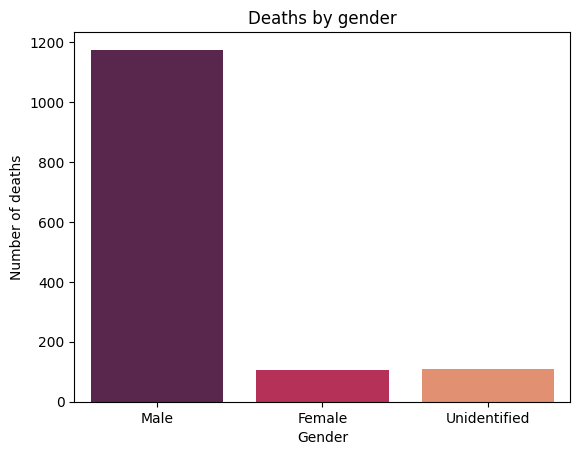

In [73]:
death_gender = sbn.countplot(x=fatality.gender, palette="rocket")
death_gender.set(xlabel='Gender', title="Deaths by gender", ylabel= 'Number of deaths')

[Text(0.5, 0, 'Times of the day'),
 Text(0.5, 1.0, 'Time of deaths'),
 Text(0, 0.5, 'Number of deaths')]

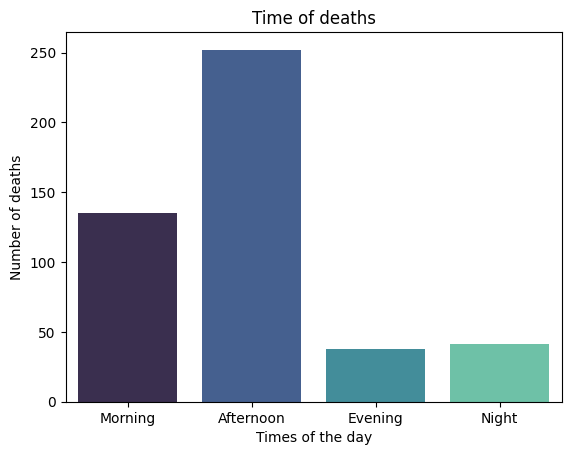

In [120]:
death_time = sbn.countplot(x=fatality.time, palette="mako", order = ["Morning","Afternoon", "Evening", "Night"])
death_time.set(xlabel='Times of the day', title="Time of deaths", ylabel= 'Number of deaths')


[Text(0.5, 0, 'Times of the day'),
 Text(0.5, 1.0, "Women's time of deaths "),
 Text(0, 0.5, 'Number of deaths')]

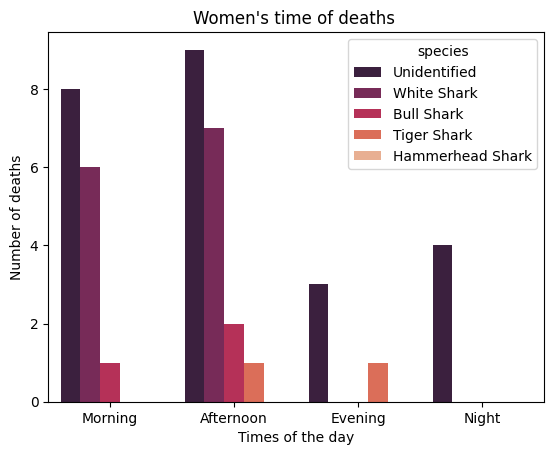

In [121]:
df_death_women = fatality.loc[(fatality.gender == "Female")]
death_women_time = sbn.countplot(x=df_death_women.time, hue =df_death_women.species, palette="rocket", hue_order = ["Unidentified","White Shark", "Bull Shark","Tiger Shark", "Hammerhead Shark"],order = ["Morning","Afternoon", "Evening", "Night"])
death_women_time.set(xlabel='Times of the day', title="Women's time of deaths ", ylabel= 'Number of deaths')



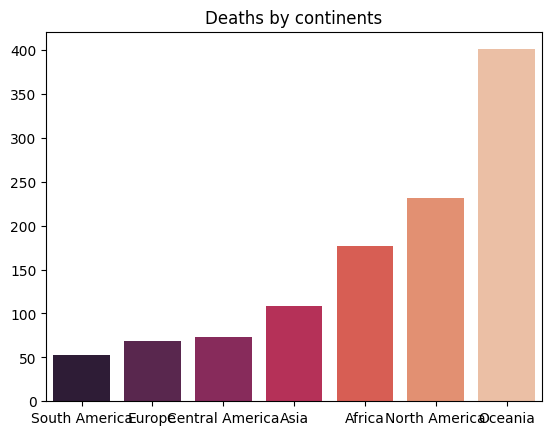

In [119]:
fatal = ["South America", "Europe","Central America","Asia","Africa","North America","Oceania" ]
continent = [53, 69, 73, 109, 177, 232, 401]
death_continent = sbn.barplot(x=fatal, y=continent, palette="rocket", order = fatal).set(title="Deaths by continents")




[Text(0.5, 1.0, 'Incidents involving sharks after 1900')]

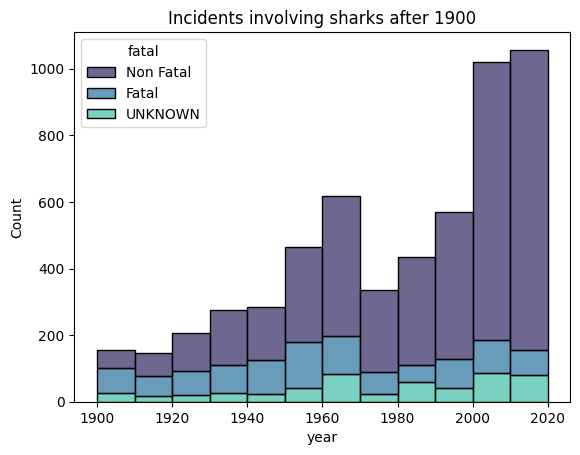

In [99]:
condition_1 = jaws.year >= 1900
condition_2 = jaws.fatal == "UNKOWN"
condition_3 = jaws.fatal == "Fatal"
hist_df = jaws[condition_1]
continent_death = jaws[condition_1 & condition_3]
sbn.histplot(x=hist_df.year, hue = hist_df.fatal, binwidth=10, multiple = "stack", palette="mako").set(title="Incidents involving sharks after 1900")


In [84]:
jaws.time.value_counts()

time
UNKOWN       3458
Afternoon    1551
Morning       899
Evening       265
Night         129
Name: count, dtype: int64

[Text(0.5, 1.0, 'Deaths per year involving sharks from 1900 to 2020')]

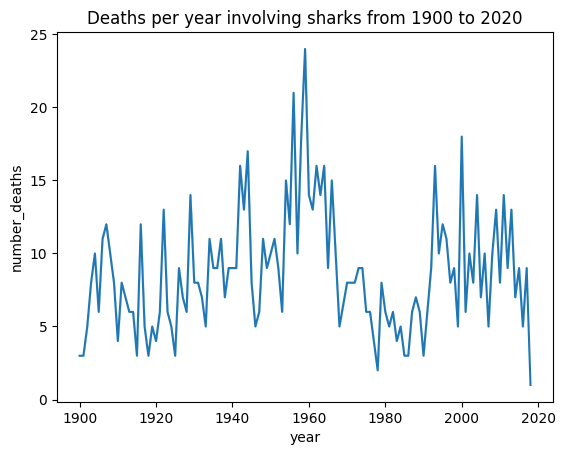

In [86]:
sbn.lineplot(data =continent_death, x="year", y="number_deaths", estimator="sum").set(title="Deaths per year involving sharks from 1900 to 2020")
#continent_death.head()

In [127]:
df_death_women.number_deaths.value_counts()

number_deaths
1.0    107
Name: count, dtype: int64

<Axes: xlabel='fatal', ylabel='count'>

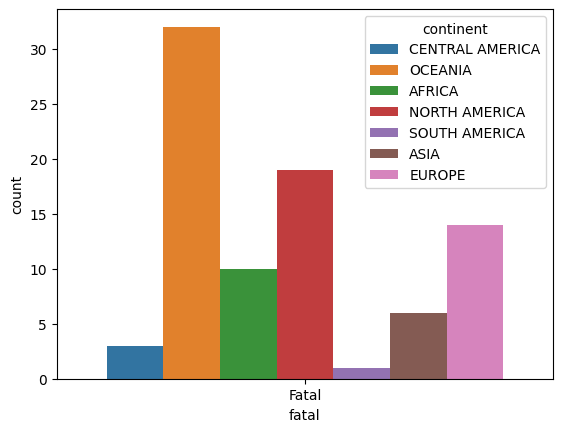

In [137]:
sbn.countplot(data=df_death_women, x= df_death_women["fatal"], hue=df_death_women["continent"])